In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt                   # For charts and visualizations
from IPython.display import Image                 # For displaying images in the notebook
from IPython.display import display 
from sklearn.model_selection import train_test_split 


In [2]:
def dateparse(d):
    return pd.to_datetime(d)

In [4]:
df = pd.read_csv(os.path.join(os.getcwd(), 'data/', 'trainset.csv'),
                        encoding= 'unicode_escape', low_memory=False, parse_dates=['measured_at'], date_parser=dateparse)


In [5]:
df.head()

,index,turbine_id,measured_at,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error_category
0,0,11,2020-01-01 00:00:00+00:00,0.433333,0.12125,266.0,266.3,0.677852,0.569444,5.0,20.0,32.0,0.85,-1.9,189.2,1,NO_ERROR
1,1,11,2020-01-01 00:10:00+00:00,0.458333,0.13875,266.6,267.0,0.704698,0.591766,5.0,20.0,33.0,0.88,NaN,189.5,1,NO_ERROR
2,2,11,2020-01-01 00:20:00+00:00,0.508333,0.18295,270.7,269.4,0.771812,0.647321,5.0,20.0,34.0,0.92,-2.0,190.1,1,NO_ERROR
3,3,11,2020-01-01 00:30:00+00:00,0.525000,0.21810,272.1,272.7,0.805369,0.676091,5.0,20.0,38.0,0.94,-2.0,190.0,1,NO_ERROR
4,4,11,2020-01-01 00:40:00+00:00,0.541667,0.23430,279.5,281.1,0.832215,0.700397,5.0,20.0,41.0,0.95,-2.0,189.9,1,NO_ERROR


In [6]:
df['error'] = (df['error_category'] != 'NO_ERROR').astype(int)

In [9]:
df = df.drop(columns=['index'])

In [10]:
y = df.error
X = df.drop(columns=['error','error_category'])

col_0,% observations
error_category,
ERROR=12,0.034907
ERROR=17,0.015836
ERROR=19,0.002738
ERROR=20,0.000576
ERROR=22,0.000103
ERROR=23,0.000001
ERROR=24,0.001295
ERROR=25,0.000079
ERROR=27,0.000016


,turbine_id,wind_speed,power,nacelle_direction,wind_direction,rotor_speed,generator_speed,temp_environment,temp_hydraulic_oil,temp_gear_bearing,cosphi,blade_angle_avg,hydraulic_pressure,park_id,error
count,1.367190e+06,1.266014e+06,1.309054e+06,1.367190e+06,1.367190e+06,1.270268e+06,1.268654e+06,1.295786e+06,1.295632e+06,1.296615e+06,1.367190e+06,1.179701e+06,1.367190e+06,1.367190e+06,1.367190e+06
mean,2.244315e+01,4.663860e-01,2.384691e-01,1.887500e+02,1.882401e+02,6.573762e-01,5.836231e-01,1.419195e+01,3.969343e+01,5.803339e+01,6.769930e-01,4.628796e+00,2.349338e+02,1.796216e+00,6.917912e-02
std,5.554621e+00,2.134209e-01,2.781603e-01,9.951697e+01,9.944392e+01,3.002881e-01,2.670225e-01,6.901452e+00,7.082436e+00,1.209096e+01,6.068740e-01,1.844806e+01,2.577628e+01,4.028107e-01,2.537586e-01
min,1.100000e+01,7.692308e-03,-1.770000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.100000e+01,5.000000e+00,6.000000e+00,-1.000000e+00,-5.000000e+00,-2.000000e+00,1.000000e+00,0.000000e+00
25%,2.100000e+01,3.153846e-01,2.669697e-02,9.180000e+01,9.130000e+01,5.250000e-01,4.669333e-01,9.000000e+00,3.900000e+01,5.000000e+01,7.700000e-01,-2.800000e+00,2.467000e+02,2.000000e+00,0.000000e+00
50%,2.400000e+01,4.416667e-01,1.309500e-01,2.120000e+02,2.116000e+02,6.750000e-01,5.962302e-01,1.400000e+01,4.200000e+01,6.000000e+01,1.000000e+00,-2.100000e+00,2.471000e+02,2.000000e+00,0.000000e+00
75%,2.700000e+01,5.846154e-01,3.501515e-01,2.603000e+02,2.598000e+02,8.916667e-01,7.904000e-01,1.900000e+01,4.400000e+01,6.700000e+01,1.000000e+00,8.000000e-01,2.472000e+02,2.000000e+00,0.000000e+00
max,2.900000e+01,1.950000e+00,1.001242e+00,3.599000e+02,3.599000e+02,1.116667e+00,9.981333e-01,4.100000e+01,8.900000e+01,8.600000e+01,1.000000e+00,9.030000e+01,2.617000e+02,2.000000e+00,1.000000e+00


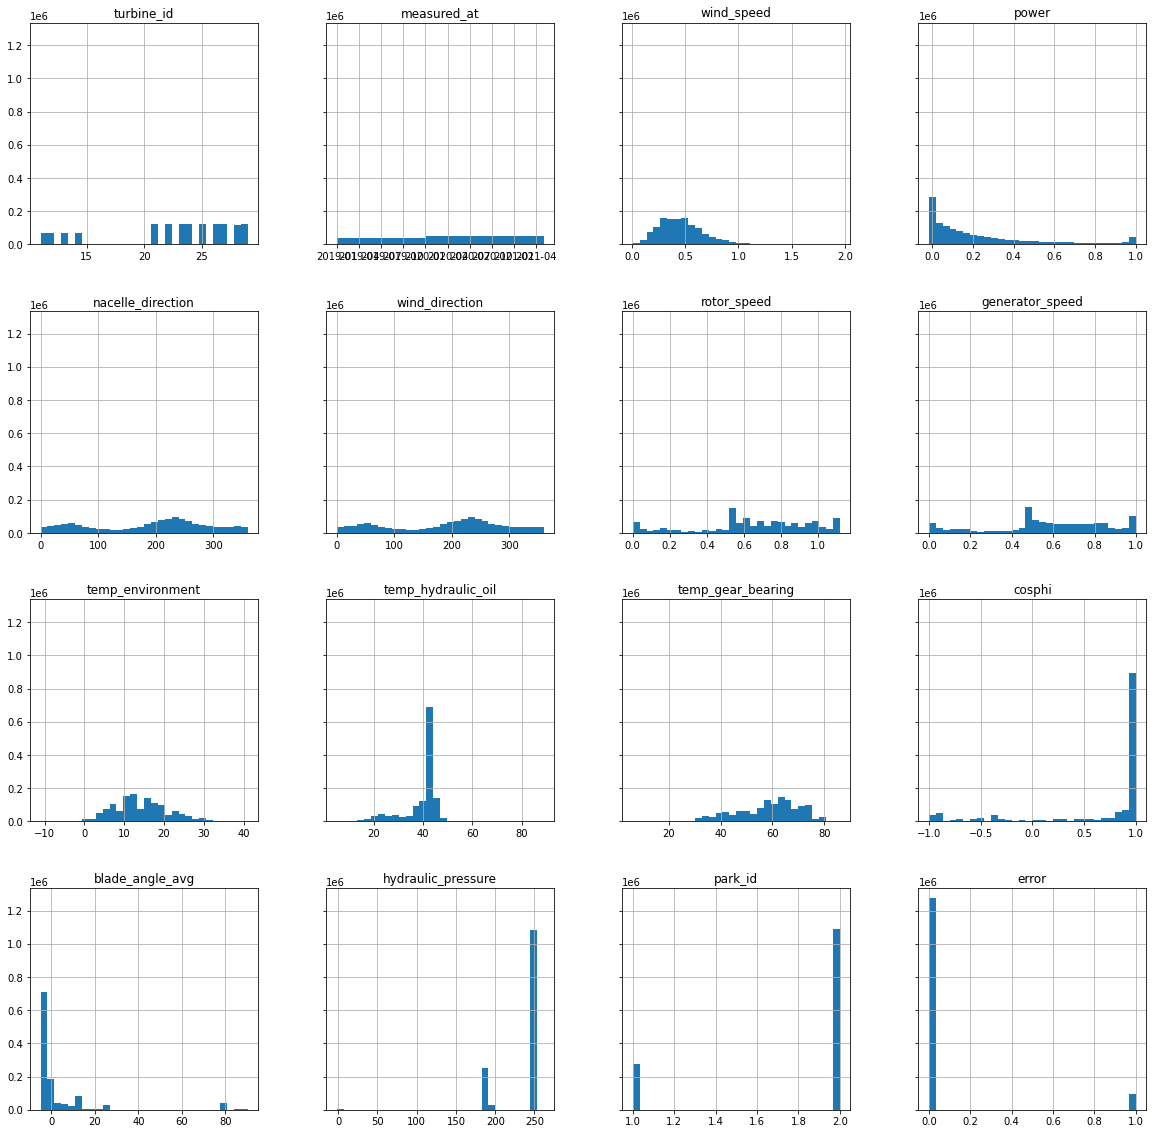

In [12]:
for column in df.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=df[column], columns='% observations', normalize='columns'))

# Histograms for each numeric features
display(df.describe()) 
%matplotlib inline
hist = df.hist(bins=30, sharey=True, figsize=(20, 20))

turbine_id


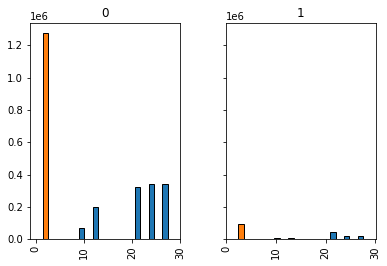

measured_at


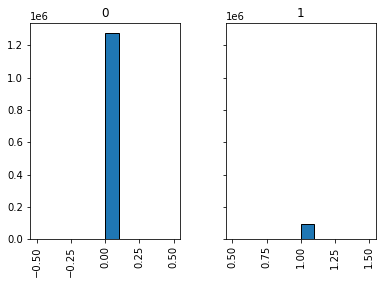

wind_speed


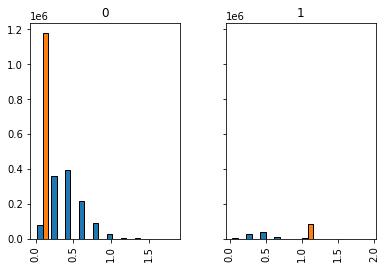

power


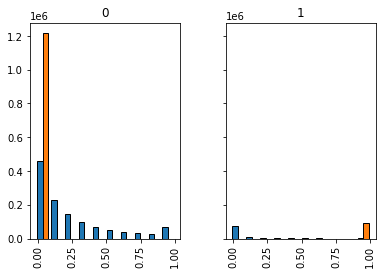

nacelle_direction


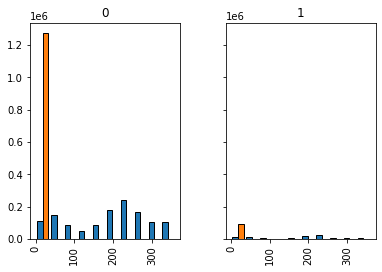

wind_direction


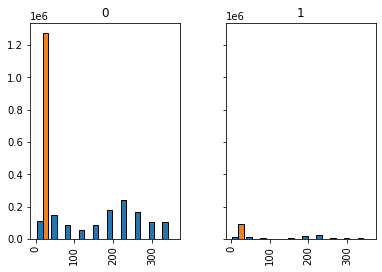

rotor_speed


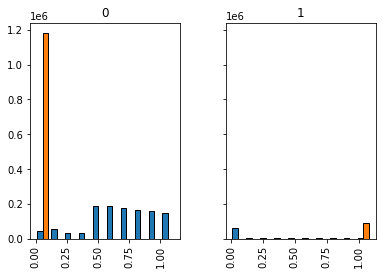

generator_speed


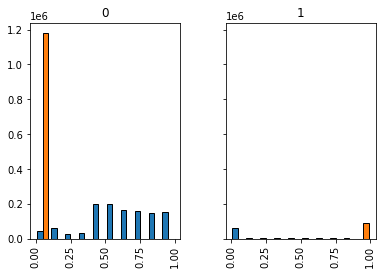

temp_environment


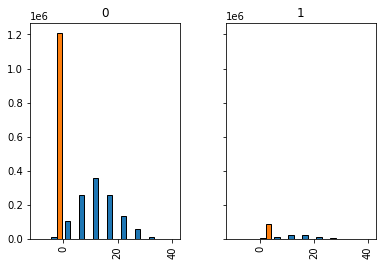

temp_hydraulic_oil


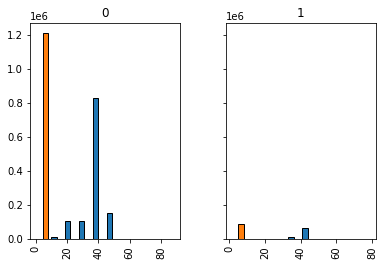

temp_gear_bearing


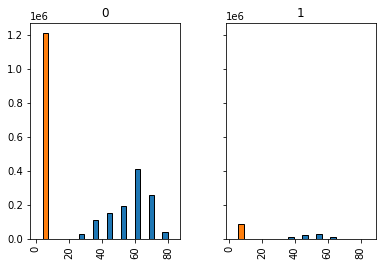

cosphi


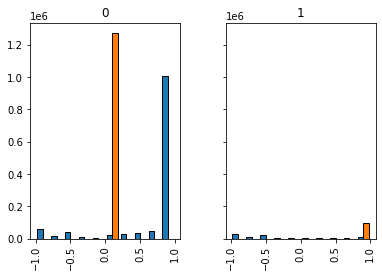

blade_angle_avg


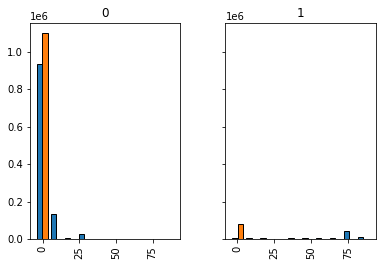

hydraulic_pressure


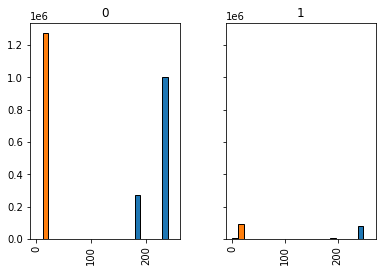

park_id


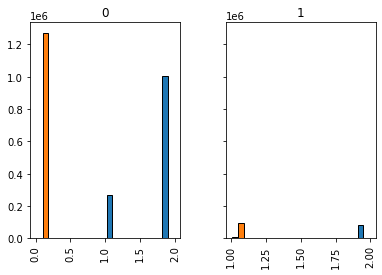

In [13]:
for column in X.select_dtypes(exclude=['object']).columns: 
    print(column)
    hist = df[[column,'error']].hist(by='error', bins=10, ec='black', sharey=True)
    plt.show()

                                                Train with Gradient Boosting on ERROR / NO-ERROR   
_____________________________________________________________________________________________________________________

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=11) 